This notebook presents a brief introduction to the mapping capabilities of R. First we will need to install a few packages: ggmap, sf, osmdata, and osrm which will allow us to retrieve and visualize spatial data. Warning: sf installation for MacOS or Linux requires a bit of extra work, please follow the instructions [here](https://github.com/r-spatial/sf).  

In [2]:
install.packages("ggmap")
install.packages("osmdata")
install.packages("sf")
install.packages("osrm")

Installing package into ‘/home/daniel/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


The package ggmap is essentially an extension of ggplot; it enables you to plot a map as the background of a ggplot graph. The package sf (simple features) provides a set of functions to manipulate spatial vector data. The package osmdata provides the functionality to download and use data from OpenStreetMap(OSM). The package OSRM (OpenStreetMap-Based Routing service) allows users to calculate travel times and routed distances (km) based on OSM network data.

In [3]:
library(tidyverse)
library(ggmap)
library(osmdata)
library(sf)
library(osrm)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.
Data (c) OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright
Linking to GEOS 3.7.1, GDAL 2.4.2, PROJ 5.2.0
Data: (c) OpenStreetMap contributors, ODbL 1.0 - http://www.openstreetmap.org/copyright
Routing: OSRM - http://project-osrm.org/


Before we actually build a query, we need to know what are the features that are available in OSM. For every feature there will also be a corresponding set of tags. Let's take a glimpse of some of the possibilities for features and tags related to the "amenity" feature. 


In [4]:
available_features() %>% glimpse()

 chr [1:217] "4wd only" "abandoned" "abutters" "access" "addr" "addr:city" ...


In [5]:
"amenity" %>% 
  available_tags() %>%
  glimpse()

 chr [1:108] "animal boarding" "animal shelter" "arts centre" "atm" ...


There are plenty of categories to choose from, now let's build a query. The getbb( ) function uses an API provided by OpenStreetMap (OSM) and returns a "bounding box" associated to a given place. opq() stands for "overpass query" and will allow us to build our query. Criteria is filtered using the add_osm_feature( ) function. Our query (q) will look for cinemas in Christchurch. add_osm_feature() takes two arguments, a feature (key="amenity") and a tag (value="cinema).

In [7]:
q <- getbb("Christchurch")%>%
      opq()%>%
       add_osm_feature("amenity", "cinema")

What is stored inside of q? Our query is actually a list containing four character vectors including the geographhic coordinates of our bounding box, and our search criteria.  

In [3]:
q %>% glimpse()

List of 4
 $ bbox    : chr "-43.690955,172.4766455,-43.370955,172.7966455"
 $ prefix  : chr "[out:xml][timeout:25];\n(\n"
 $ suffix  : chr ");\n(._;>;);\nout body;"
 $ features: chr " [\"amenity\"=\"cinema\"]"
 - attr(*, "class")= chr [1:2] "list" "overpass_query"


Let's begin to extract some data. The osmdata_*( ) function sends the query to the server and, depending on the suffix * sf/sp/xml, returns a simple feature, spatial or XML format. A simple feature is standard file that used to access and work with one or two-dimensional geometries (point, line, and polygon) used in Geographic Information Systems. Let's try to extract the data in the form of a simple feature, what is stored inside of cinema?

In [8]:
cinema <- q %>% 
  osmdata_sf()

In [5]:
cinema %>% glimpse()

List of 8
 $ bbox             : chr "-43.690955,172.4766455,-43.370955,172.7966455"
 $ overpass_call    : chr "[out:xml][timeout:25];\n(\n node  [\"amenity\"=\"cinema\"] (-43.690955,172.4766455,-43.370955,172.7966455);\n w"| __truncated__
 $ meta             :List of 3
  ..$ timestamp       : chr "[ Tue 3 Sep 2019 21:21:02 ]"
  ..$ OSM_version     : chr "0.6"
  ..$ overpass_version: chr "Overpass API 0.7.55.7 8b86ff77"
 $ osm_points       :Classes ‘sf’ and 'data.frame':	20 obs. of  16 variables:
  ..$ osm_id            : chr [1:20] "362887434" "1150574409" "1160428371" "1169883994" ...
  ..$ name              : chr [1:20] NA "Reading Cinemas" "Hoyts Cinema" NA ...
  ..$ addr.city         : chr [1:20] NA "Christchurch" "Christchurch" NA ...
  ..$ addr.street       : chr [1:20] NA "Marshland Road" "Main North Road" NA ...
  ..$ alt_name          : chr [1:20] NA NA "Hoyts 6" NA ...
  ..$ amenity           : chr [1:20] NA "cinema" "cinema" NA ...
  ..$ branch            : chr [1:20] NA "Th

The result is a list of different objects, including simple feature classes and we are going to use ggplot's geom_sf() function to visualize them. geom_sf() uses a geometry object as its unique aesthetic, so in order to avoid conflicts with the default plot specification we set inherit.aes to FALSE, please have a look at the documentation [here](https://ggplot2.tidyverse.org/reference/ggsf.html). 
The two main plotting features of ggmap are the get_map() function, which downloads a background map from a specified map provider (i.e Google Maps, OSM, Stamen Maps), and the ggmap() function that plots the raster map provided by get_map(). If you want to get familiar with GIS terminology you can read about it [here](https://gisgeography.com/spatial-data-types-vector-raster/). Notice the maptype argument for ggmap; it allows to specify the map theme, and options available include: "satellite","terrain", "hybrid", etc.  Once a map is downloaded and plotted, it is then possible to use the normal grammar of gglot to visually represent that data on the map.

In [4]:
chc_map <- "Christchurch" %>%
  getbb() %>%
  get_map(source = "stamen", maptype = "toner")

Source : http://tile.stamen.com/terrain/12/4010/2596.png
Source : http://tile.stamen.com/terrain/12/4011/2596.png
Source : http://tile.stamen.com/terrain/12/4012/2596.png
Source : http://tile.stamen.com/terrain/12/4013/2596.png
Source : http://tile.stamen.com/terrain/12/4014/2596.png
Source : http://tile.stamen.com/terrain/12/4010/2597.png
Source : http://tile.stamen.com/terrain/12/4011/2597.png
Source : http://tile.stamen.com/terrain/12/4012/2597.png
Source : http://tile.stamen.com/terrain/12/4013/2597.png
Source : http://tile.stamen.com/terrain/12/4014/2597.png
Source : http://tile.stamen.com/terrain/12/4010/2598.png
Source : http://tile.stamen.com/terrain/12/4011/2598.png
Source : http://tile.stamen.com/terrain/12/4012/2598.png
Source : http://tile.stamen.com/terrain/12/4013/2598.png
Source : http://tile.stamen.com/terrain/12/4014/2598.png
Source : http://tile.stamen.com/terrain/12/4010/2599.png
Source : http://tile.stamen.com/terrain/12/4011/2599.png
Source : http://tile.stamen.com

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


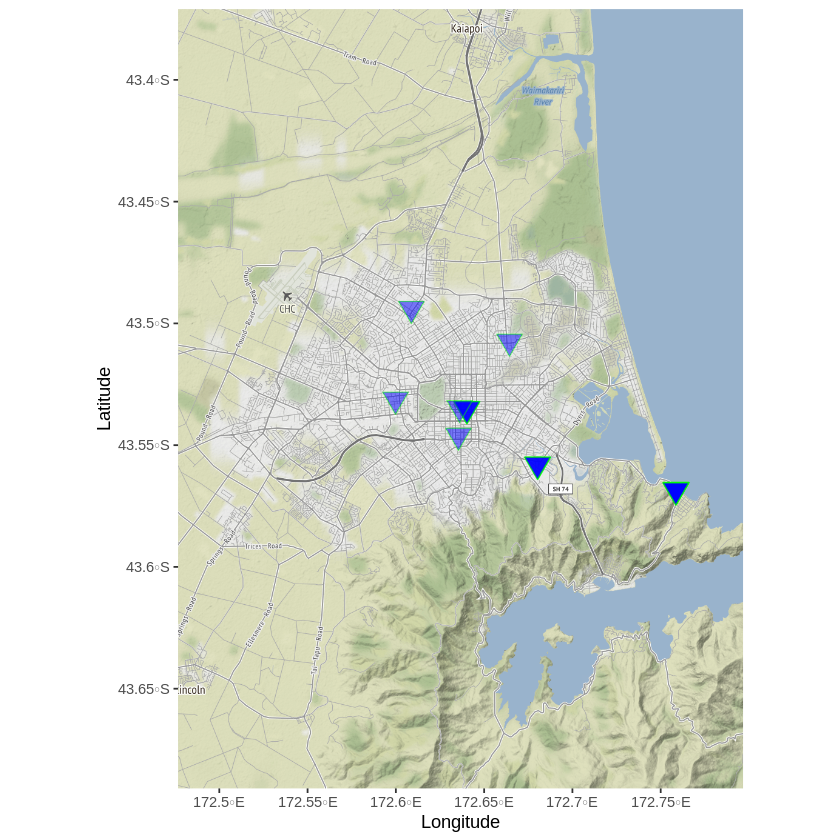

In [9]:
chc_map %>%
  ggmap()+
    geom_sf(data=cinema$osm_points,
          inherit.aes =FALSE,
          colour="green",
          fill="blue",
          alpha=.5,
          size=5,
          shape=25)+
  labs(x="Longitude",y="Latitude")

There are other features available in OSM and they can be represented through other geometry types like lines. Let's create a new query and this time we will try to map cycle ways within Christchurch. 

In [10]:
q_2 <- getbb("Christchurch")%>%
      opq()%>%
       add_osm_feature("cycleway", "lane")
cycleway <- q_2 %>% osmdata_sf()

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


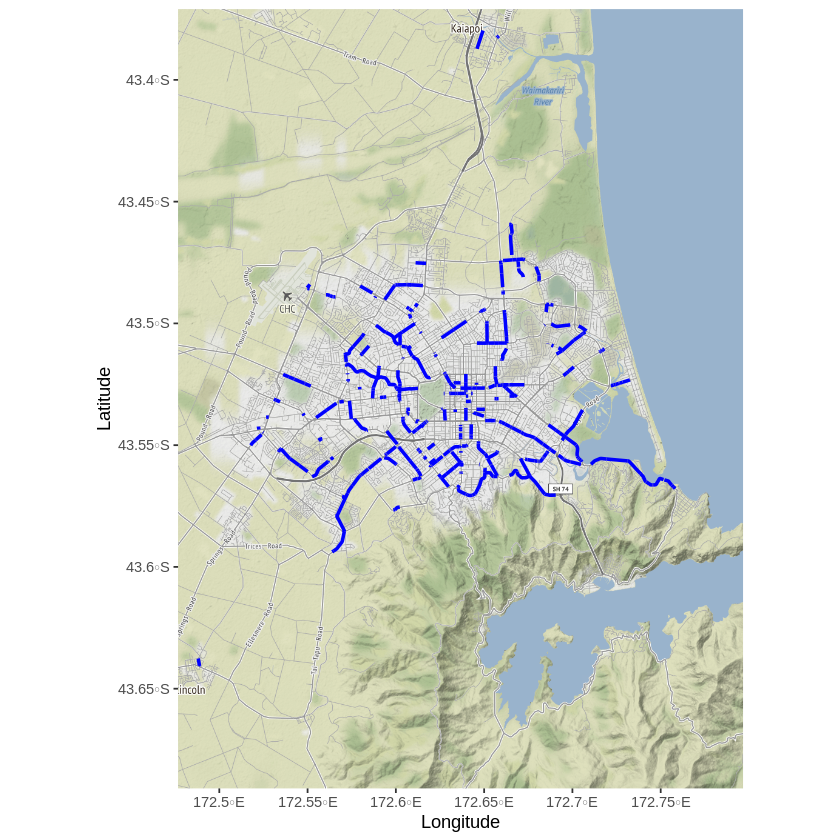

In [11]:
chc_map %>%
  ggmap()+
    geom_sf(data=cycleway$osm_lines,
          inherit.aes =FALSE,
          colour="blue",
          size=1) +
  labs(x="Longitude",y="Latitude")

What if you wanted to find the shortest route between two points. The OSRM package that can take care of that. The osrmRoute gets the shortest path between two points, it sends a query and gets the geometry of a route. The main arguments are the origin and destination, and in our case we will be passing them as sf objects. We will use two cinema locations. The remaining arguments specify the level of resolution required for our geometry and the type of object to be returned, in our case we are interested in obtaining a simple feature class.  



In [16]:
route <- osrmRoute(src=cinema$osm_points[1,],dst=cinema$osm_points[2,], 
                   overview="full", returnclass="sf")
str(route)

Classes ‘sf’ and 'data.frame':	1 obs. of  5 variables:
 $ src     : Factor w/ 1 level "362887434": 1
 $ dst     : Factor w/ 1 level "1150574409": 1
 $ duration: num 21.5
 $ distance: num 13.4
 $ geometry:sfc_LINESTRING of length 1; first list element:  XY [1:458, 1:2] 173 173 173 173 173 ...
 - attr(*, "sf_column")= chr "geometry"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA NA NA NA
  ..- attr(*, "names")= chr  "src" "dst" "duration" "distance"


Notice the contents of the route object, specifically, there are two variables containing the travel time in minutes and travel distance in kilometers. Let's plot our route. We will use ggmap as we did before.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


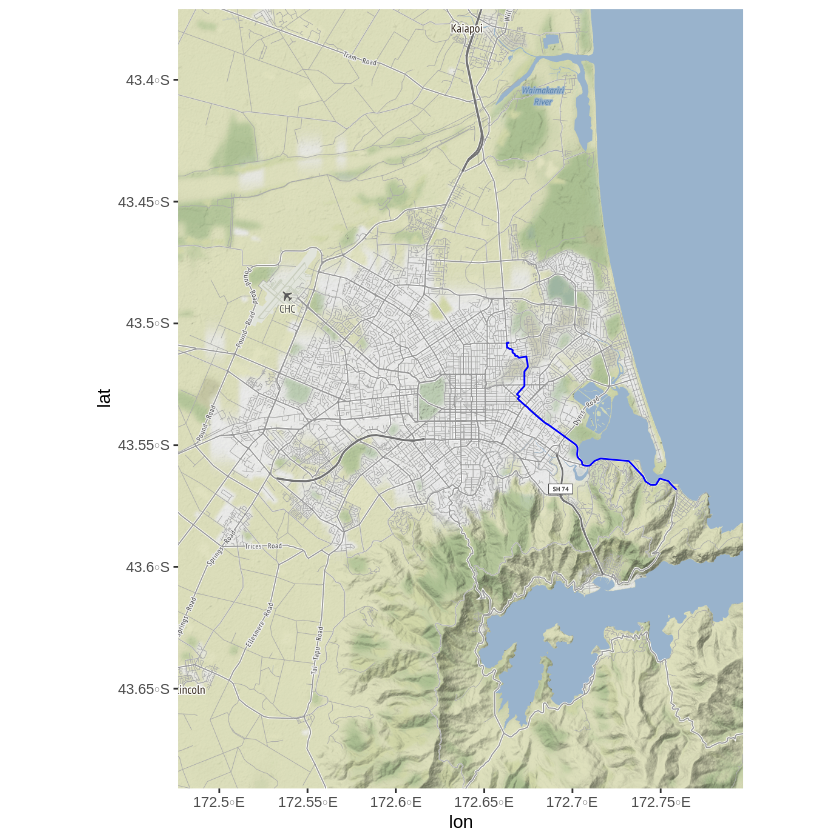

In [17]:
chc_map %>% ggmap() + geom_sf(data=route, inherit.aes = FALSE, colour ="blue") 

Think of isochrones as polygons that represent areas that fall within a certain travel time from a given location. osrmIsochrone is a function that enables users to build isochrone maps. It takes the location of a given point and a vector that specifies the number and magnitude of "travel time" breaks. We also specify the number of additional points that will eb used to calculate the isochrones.     

In [19]:
iso <- osrmIsochrone(loc = cinema$osm_points[2,], returnclass="sf", 
                    # breaks = seq(from = 0, to = 14, by = 2), res = 50)
str(iso)

Classes ‘sf’ and 'data.frame':	7 obs. of  5 variables:
 $ id      : int  1 2 3 4 5 6 7
 $ min     : num  0 2 4 6 8 10 12
 $ max     : num  2 4 6 8 10 12 14
 $ geometry:sfc_MULTIPOLYGON of length 7; first list element: List of 1
  ..$ :List of 1
  .. ..$ : num [1:7, 1:2] 173 173 173 173 173 ...
  ..- attr(*, "class")= chr  "XY" "MULTIPOLYGON" "sfg"
 $ center  : num  1 3 5 7 9 11 13
 - attr(*, "sf_column")= chr "geometry"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA NA NA NA
  ..- attr(*, "names")= chr  "id" "min" "max" "center"


Notice that our object iso contains a "center" variable which actually corresponds to travel times in minutes for different regions. We will use this variable within the aesthetics of geom_sf.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


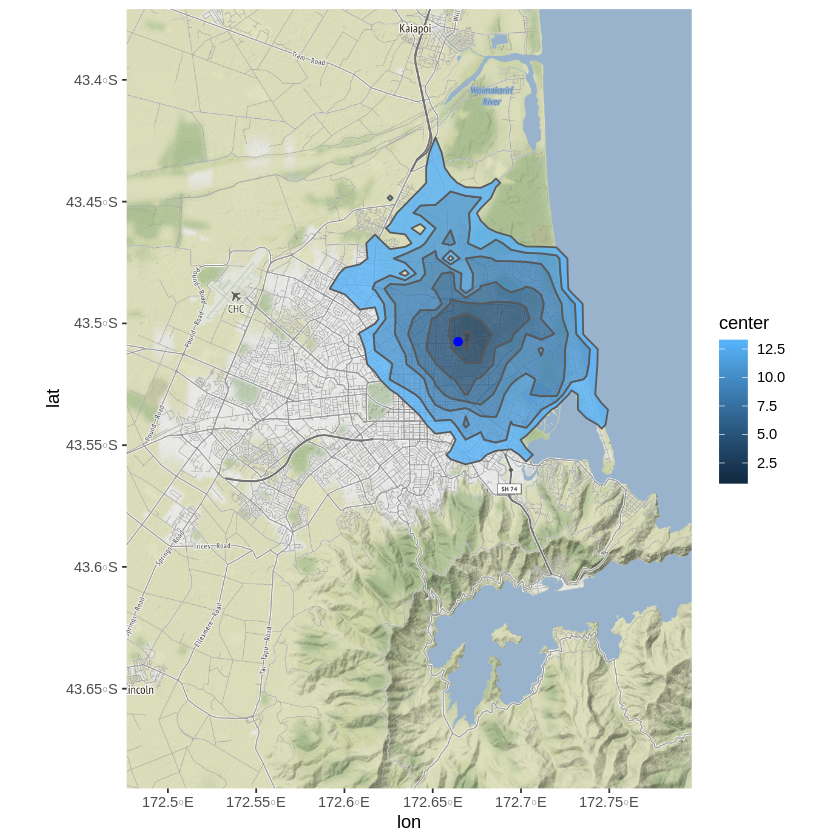

In [21]:
chc_map %>% ggmap() + geom_sf(data = iso, aes(fill = center), alpha = 0.8, inherit.aes = FALSE) +
            geom_sf(data=cinema$osm_points[2,], color = "blue", size = 2, inherit.aes = FALSE)

It is time to work on more interesting stuff. The fires in the Amazon have recently drawn a lot of media attention. NASA currently runs the Fire Information Resource Management System (FIRMS) and they have really interesting data that we can use for our exercise. The csv file is provided, however you can download the data yourself from [here](https://firms.modaps.eosdis.nasa.gov/active_fire/#firms-txt). The file we will be working with contains data on active fires in South America for the past 7 days. It contains the geographic coordinates of the fires along with other indicators such as the Fire Radiative Power (for more info, see previous link).   

In [22]:
fire_data <- "https://firms.modaps.eosdis.nasa.gov/data/active_fire/viirs/csv/VNP14IMGTDL_NRT_South_America_7d.csv" %>%
  read_csv()

Parsed with column specification:
cols(
  latitude = col_double(),
  longitude = col_double(),
  bright_ti4 = col_double(),
  scan = col_double(),
  track = col_double(),
  acq_date = col_date(format = ""),
  acq_time = col_character(),
  satellite = col_character(),
  confidence = col_character(),
  version = col_character(),
  bright_ti5 = col_double(),
  frp = col_double(),
  daynight = col_character()
)


In [23]:
fire_data %>% glimpse()

Observations: 185,463
Variables: 13
$ latitude   <dbl> -24.26521, -24.27162, -24.60362, -24.60278, -24.72002, -24…
$ longitude  <dbl> -51.40070, -51.39770, -51.14752, -51.15123, -50.87337, -50…
$ bright_ti4 <dbl> 300.1, 299.9, 343.2, 311.5, 306.6, 303.6, 331.5, 320.5, 30…
$ scan       <dbl> 0.38, 0.38, 0.36, 0.36, 0.35, 0.35, 0.33, 0.55, 0.55, 0.55…
$ track      <dbl> 0.59, 0.59, 0.57, 0.57, 0.56, 0.56, 0.55, 0.51, 0.51, 0.51…
$ acq_date   <date> 2019-09-18, 2019-09-18, 2019-09-18, 2019-09-18, 2019-09-1…
$ acq_time   <chr> "0354", "0354", "0354", "0354", "0354", "0354", "0354", "0…
$ satellite  <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N"…
$ confidence <chr> "nominal", "nominal", "nominal", "nominal", "nominal", "no…
$ version    <chr> "1.0NRT", "1.0NRT", "1.0NRT", "1.0NRT", "1.0NRT", "1.0NRT"…
$ bright_ti5 <dbl> 289.9, 289.9, 291.8, 289.4, 290.0, 290.9, 289.5, 289.7, 28…
$ frp        <dbl> 1.0, 0.6, 2.9, 2.9, 1.5, 1.1, 2.0, 3.2, 1.6, 3.5, 3.5, 3.7…
$ daynight   <ch

That is a lot of information as it contains records for South America. We want to narrow down the assessment to the region of MATO GROSSO which is one of the areas that has been affected recently. We can get the bounding box for that region. getbb actually returns a matrix with the coordinates of our bounding box.

In [24]:
MG_bb <- "STATE OF MATO GROSSO" %>%
  getbb()
MG_bb

min       max       
x -61.63300 -50.207568
y -18.04156  -7.348293

Now we can filter our dataset using the coordinates from our bounding box, and we only include observations with a high level of confidence. 

In [25]:
fire_data_MG <- fire_data %>% 
  filter(longitude > -61.63, longitude < -50.21) %>%
  filter(latitude > -18.04, latitude < -7.35) %>%
  filter(confidence == "high")

In [26]:
fire_data_MG %>% glimpse()

Observations: 3,224
Variables: 13
$ latitude   <dbl> -13.20570, -13.20692, -13.22417, -16.16123, -16.16292, -17…
$ longitude  <dbl> -51.20193, -51.19616, -51.21226, -53.68872, -53.68655, -50…
$ bright_ti4 <dbl> 367, 367, 367, 367, 367, 367, 367, 367, 367, 367, 367, 367…
$ scan       <dbl> 0.61, 0.61, 0.62, 0.77, 0.77, 0.45, 0.45, 0.54, 0.63, 0.63…
$ track      <dbl> 0.71, 0.71, 0.71, 0.77, 0.77, 0.63, 0.63, 0.67, 0.72, 0.72…
$ acq_date   <date> 2019-09-18, 2019-09-18, 2019-09-18, 2019-09-18, 2019-09-1…
$ acq_time   <chr> "0348", "0348", "0348", "0348", "0348", "0348", "0348", "0…
$ satellite  <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N"…
$ confidence <chr> "high", "high", "high", "high", "high", "high", "high", "h…
$ version    <chr> "1.0NRT", "1.0NRT", "1.0NRT", "1.0NRT", "1.0NRT", "1.0NRT"…
$ bright_ti5 <dbl> 295.2, 296.4, 296.6, 293.4, 295.1, 297.3, 306.1, 297.2, 29…
$ frp        <dbl> 10.7, 10.7, 10.5, 16.2, 19.8, 6.1, 33.4, 7.9, 14.6, 19.9, …
$ daynight   <chr>

Now we convert our data frame into an sf (simple feature) object that aside the original columns will have an additional geometry component. Then, with st_crs, we assign a geographic coordinate system, in our case we use WGS84 (World Geodetic Survey 1984). If you want to learn more about coordinate systems and projections, please go [here](http://resources.esri.com/help/9.3/arcgisengine/dotnet/89b720a5-7339-44b0-8b58-0f5bf2843393.htm) 

In [27]:
fire_MG_sf <- fire_data_MG %>%
  st_as_sf(coords=c("longitude","latitude"))

In [28]:
st_crs(fire_MG_sf)

Coordinate Reference System: NA

In [29]:
st_crs(fire_MG_sf) <- 4326
st_crs(fire_MG_sf)

Coordinate Reference System:
  EPSG: 4326 
  proj4string: "+proj=longlat +datum=WGS84 +no_defs"

In [30]:
str(fire_MG_sf)

Classes ‘sf’, ‘tbl_df’, ‘tbl’ and 'data.frame':	3224 obs. of  12 variables:
 $ bright_ti4: num  367 367 367 367 367 367 367 367 367 367 ...
 $ scan      : num  0.61 0.61 0.62 0.77 0.77 0.45 0.45 0.54 0.63 0.63 ...
 $ track     : num  0.71 0.71 0.71 0.77 0.77 0.63 0.63 0.67 0.72 0.72 ...
 $ acq_date  : Date, format: "2019-09-18" "2019-09-18" ...
 $ acq_time  : chr  "0348" "0348" "0348" "0348" ...
 $ satellite : chr  "N" "N" "N" "N" ...
 $ confidence: chr  "high" "high" "high" "high" ...
 $ version   : chr  "1.0NRT" "1.0NRT" "1.0NRT" "1.0NRT" ...
 $ bright_ti5: num  295 296 297 293 295 ...
 $ frp       : num  10.7 10.7 10.5 16.2 19.8 6.1 33.4 7.9 14.6 19.9 ...
 $ daynight  : chr  "N" "N" "N" "N" ...
 $ geometry  :sfc_POINT of length 3224; first list element: Classes 'XY', 'POINT', 'sfg'  num [1:2] -51.2 -13.2
 - attr(*, "sf_column")= chr "geometry"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA NA NA NA NA NA NA NA NA NA ...
  ..- attr(*, "names")= chr  "bright_ti4" 

Note the additional geometry list-column which holds the coordinates of all of our points. Let's extract some more data. As you have seen previously, OSM uses lots of features and tags to describe different things within a given area. For this particular example, we are interested in land use, more specifically on farmland and protected areas. Let's build a few queries upon these ideas. Let's start by using "landuse" as a key and "farmland" as a tag.

In [31]:
q_fm <- MG_bb %>%
      opq() %>%
      add_osm_feature("landuse", "farmland")
MG_farmland <- q_fm %>% osmdata_sf()

In [32]:
MG_farmland %>% glimpse()

List of 8
 $ bbox             : chr "-18.0415597,-61.633,-7.3482932,-50.2075677"
 $ overpass_call    : chr "[out:xml][timeout:25];\n(\n node  [\"landuse\"=\"farmland\"] (-18.0415597,-61.633,-7.3482932,-50.2075677);\n wa"| __truncated__
 $ meta             :List of 3
  ..$ timestamp       : chr "[ Thu 5 Sep 2019 00:18:03 ]"
  ..$ OSM_version     : chr "0.6"
  ..$ overpass_version: chr "Overpass API 0.7.55.7 8b86ff77"
 $ osm_points       :Classes ‘sf’ and 'data.frame':	30783 obs. of  10 variables:
  ..$ osm_id     : chr [1:30783] "346397126" "346399370" "346402337" "346793505" ...
  ..$ name       : chr [1:30783] NA NA NA NA ...
  ..$ addr.street: chr [1:30783] NA NA NA NA ...
  ..$ destination: chr [1:30783] NA NA NA NA ...
  ..$ junction   : chr [1:30783] NA NA NA NA ...
  ..$ landuse    : chr [1:30783] NA NA NA NA ...
  ..$ owner      : chr [1:30783] NA NA NA NA ...
  ..$ power      : chr [1:30783] NA NA NA NA ...
  ..$ source     : chr [1:30783] "IBGE" "IBGE" "IBGE" "IBGE" ...
  ..$ 

For the next query we use "boundary" as a key and "protected area" as a tag.

In [33]:
q_pa <- MG_bb %>%
      opq() %>%
       add_osm_feature("boundary","protected_area")
MG_protected <- q_pa %>% osmdata_sf()

In [34]:
MG_protected %>% glimpse()

List of 8
 $ bbox             : chr "-18.0415597,-61.633,-7.3482932,-50.2075677"
 $ overpass_call    : chr "[out:xml][timeout:25];\n(\n node  [\"boundary\"=\"protected_area\"] (-18.0415597,-61.633,-7.3482932,-50.2075677"| __truncated__
 $ meta             :List of 3
  ..$ timestamp       : chr "[ Thu 5 Sep 2019 00:18:03 ]"
  ..$ OSM_version     : chr "0.6"
  ..$ overpass_version: chr "Overpass API 0.7.55.7 8b86ff77"
 $ osm_points       :Classes ‘sf’ and 'data.frame':	189078 obs. of  25 variables:
  ..$ osm_id          : chr [1:189078] "96447745" "318915326" "318915904" "318915905" ...
  ..$ name            : chr [1:189078] NA NA NA NA ...
  ..$ addr.street     : chr [1:189078] NA NA NA NA ...
  ..$ alt_name        : chr [1:189078] NA NA NA NA ...
  ..$ amenity         : chr [1:189078] NA NA NA NA ...
  ..$ bus             : chr [1:189078] NA NA NA NA ...
  ..$ crossing        : chr [1:189078] NA NA NA NA ...
  ..$ description     : chr [1:189078] NA NA NA NA ...
  ..$ fixme           :

Now we are ready to start making some plots. First we extract a background "satellite" map for our region of interest. Let's take a look at both, farm and protected areas.   

In [35]:
MG_bg_map <- MG_bb %>%
    get_map(maptype = "satellite")

Source : http://tile.stamen.com/terrain/6/21/33.png
Source : http://tile.stamen.com/terrain/6/22/33.png
Source : http://tile.stamen.com/terrain/6/23/33.png
Source : http://tile.stamen.com/terrain/6/21/34.png
Source : http://tile.stamen.com/terrain/6/22/34.png
Source : http://tile.stamen.com/terrain/6/23/34.png
Source : http://tile.stamen.com/terrain/6/21/35.png
Source : http://tile.stamen.com/terrain/6/22/35.png
Source : http://tile.stamen.com/terrain/6/23/35.png


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


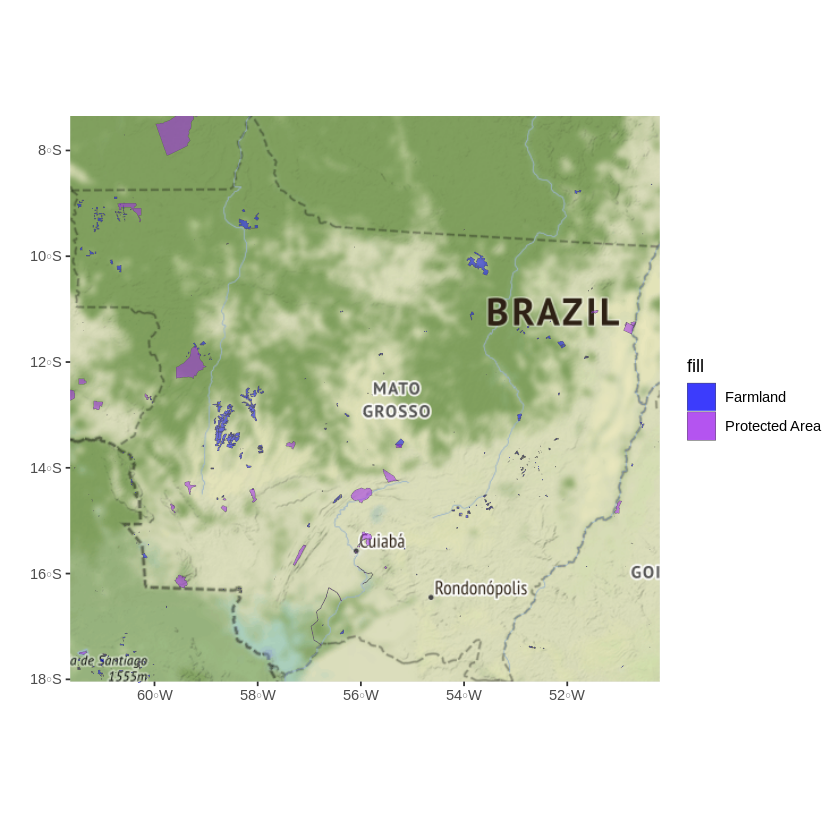

In [41]:
MG_bg_map %>% ggmap()+
  geom_sf(data=MG_farmland$osm_polygons,
          inherit.aes =FALSE,
          aes(fill="Farmland"),
          alpha=.5,
          size=0.1, show.legend = "polygon")+
  geom_sf(data=MG_protected$osm_polygons,
          inherit.aes =FALSE,
          aes(fill="Protected Area"),
          alpha=.5,
          size=0.1, show.legend = "polygon")+
  scale_fill_manual(values = c("Farmland" = "blue", "Protected Area" = "purple")) +
  labs(x="",y="")

It looks like in some parts the farms and the protected areas are very close to each other, in some cases they almost overlap. What about the fires? Let's bring them to our plot. 
The function coord_sf allows us to define the coordinate system that will be used within our plotting functions, in this case we use it to ensure that all of the layers of our plot are based on the same coordinate system. We will assign a color aesthetic to our Fire Radiative Power (rfp) attribute.

In [29]:
MG_bg_map <- "STATE OF MATO GROSSO" %>%
    getbb() %>%
    get_map(maptype = "terrain")

Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Coordinate system already present. Adding new coordinate system, which will replace the existing one.


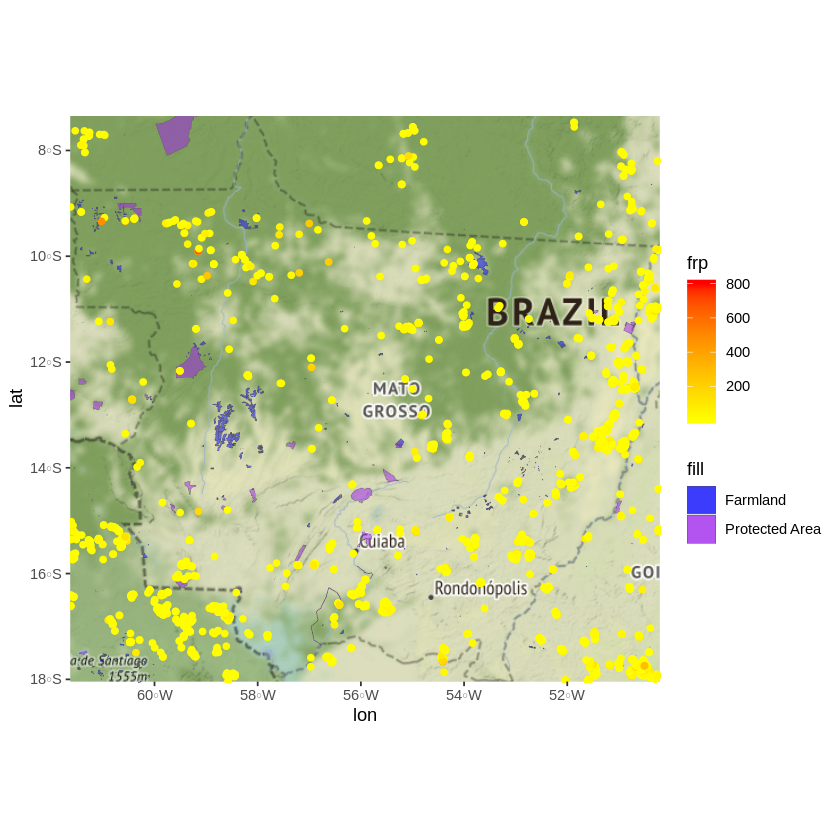

In [42]:
ggmap(MG_bg_map) + 
    coord_sf(crs = st_crs(4326)) +
    geom_sf(data=MG_farmland$osm_polygons,
          inherit.aes =FALSE,
          aes(fill="Farmland"),
          alpha=.5,
          size=0.1, show.legend = "polygon")+
  geom_sf(data=MG_protected$osm_polygons,
          inherit.aes =FALSE,
          aes(fill="Protected Area"),
          alpha=.5,
          size=0.1, show.legend = "polygon")+
  scale_fill_manual(values = c("Farmland" = "blue", "Protected Area" = "purple")) +
  geom_sf(data=fire_MG_sf, aes(color = frp),inherit.aes = FALSE) +
  scale_color_gradient(low="yellow", high="red") 

This notebook a only a brief introduction to mapping in R. If you are more interested in these topics and want to dig deeper into geographic data analysis I suggest you check out the following [Geocomputation with R](geocompr.robinlovelace.net) . It was recently released, is open source and has lots of examples using New Zealand as a case of study.  